## Feature Scaling

> Feature Scaling Technique used to normalise the range of features will be MinMaxScaler. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we will be scaling between 0 and 1.

In [11]:
df_clean = pd.read_csv('clean_data.csv')
df_clean.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_eval_missing,department_IT,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,department_unknown,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Train_Test Split

In [12]:
y = df_clean.status
X = df_clean.drop('status', axis = 1)

In [13]:
# since there is some class imbalance (i.e. more employees with turnover=0 than turnover=1)
# use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11254, 22)
y_train shape:  (11254,)
X_test shape:  (2814, 22)
y_test shape:  (2814,)


### Instantiate & Fit MinMax Scaler object to the data

In [14]:
scaler = MinMaxScaler()

In [15]:
# fit the scaler to the train & test sets, it will learn the parameters
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build Machine Learning Models

### Model Baseline Accuracy
>
> Make a baseline prediction for our model to measure how well the chosen models will perform. As this is a classification problem, the class with the most observation will be used. 

In [16]:
# get baseline accuracy score
y_train_mode = statistics.mode(y_train)
y_pred_base = [y_train_mode] * len(y_test)
score = accuracy_score(y_test, y_pred_base)
print(f'Baseline accuracy score {round(score * 100,0)}%')

Baseline accuracy score 76.0%


### Evaluate Classification Models

>To find the model model for our dataset, 7 machine learning models will be considered to precisely classify what class/group our observation(employee) belongs to - Left or Employed: 
> 1. **Logistic Regression:** ***(basic linear classifier)*** A machine learning classification algorithm used to predict the probability of a "Left" or "Employed" class. Logistic Regression algorithm is not as sophisticated as the ensemble methods or boosted decision trees method discussed below, however, it provides us with a good benchmark. 
> 2. **Random Forest:** ***(ensemble bagging classifier)*** Random forest is an ensemble of many decision trees. It combines the simplicity of a decision tree with flexibility resulting in an improvement in accuracy. Used in regression and classification problems, random forest relies on an ensemble of decision trees, which are a series of decisions that can be used to classify an observation in a dataset. Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It can handle a large number of features, and is helpful for estimating which of the variables are important in the underlying data being modeled.
> 3. **Support Vector Machine (SVM):** ***(maximum margin classifier)*** SVM is a fast classification algorithm that performs very well with a limited number of data.
> 4. **XGBoost:** ***(extreme boosting classifier)*** XGBoost (eXtreme Gradient Boosting) is not only an algorithm. It is an entire open-source library, designed as an optimized implementation of the Gradient Boosting framework and focuses on speed, flexibility, and model performances. Its strength does not only come from the algorithm, but also from all the underlying system optimization (parallelization, caching, hardware optimization). XGBoost is mainly used with a “Tree Base learner”, which means that the XGBoost model is based on Decision Trees. 
> 5. **K-Nearest Neighbour (KNN):** ***(instance based classifier)*** K-Nearest Neighbors takes a different approach to modeling than logistic regression. In order to estimate a class membership (classification), the algorithm finds the observations in its training data that are "nearest" to the observation to predict. It then takes a majority vote of those training observations' target values to estimate the value for the new data point.
> 6. **Decision Tree Classifier:** ***(rule based classifier)*** Decision Tree algorithm uses a set of rules to make decisions. It uses a tree-like structure of decisions/consequences to evaluate the possible events involved in a particular problem. The goal is to create a training model that can be used to predict the class of the target variable by learning simple decision rules inferred from prior data(training data). In Decision Trees, for predicting a class label for n observation we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.
> 7. **Gaussian Naive Bayes:** ***(probablistic classifier)*** Naive Bayes is a supervised learning algorithm that uses conditional probability to predict a class. It assumes independence among predictors and that the features follow a normal distribution. 

In [17]:
# selection of algorithms to set performance measure
models = []
models.append(('LogReg', LogisticRegression(solver='liblinear', random_state=101,
                                                         class_weight='balanced')))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=101)))
models.append(('SVM', SVC(gamma='auto', random_state=101)))
models.append (('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('GNB', GaussianNB()))

In [18]:
results = []
names = []
dfs = [] # create a variable dfs to hold all the datasets that will be created from the kfold
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['Employed', 'Left']

# evaluate each classifier model using cross-validation
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True) # 10-fold cross-validation
        
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        
        clf = model.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        print(name)
        
        print(classification_report(y_test, y_pred, target_names=target_names))

        results.append(cv_results)
        names.append(name)

        # set table to table to populate with performance results
        df_results = pd.DataFrame(cv_results)
        df_results['model'] = name
        dfs.append(df_results)

final = pd.concat(dfs, ignore_index=True)


LogReg
              precision    recall  f1-score   support

    Employed       0.92      0.74      0.82      2141
        Left       0.49      0.79      0.61       673

    accuracy                           0.75      2814
   macro avg       0.70      0.77      0.71      2814
weighted avg       0.82      0.75      0.77      2814

RF
              precision    recall  f1-score   support

    Employed       0.98      0.99      0.99      2141
        Left       0.98      0.93      0.96       673

    accuracy                           0.98      2814
   macro avg       0.98      0.96      0.97      2814
weighted avg       0.98      0.98      0.98      2814

SVM
              precision    recall  f1-score   support

    Employed       0.97      0.96      0.96      2141
        Left       0.87      0.92      0.89       673

    accuracy                           0.95      2814
   macro avg       0.92      0.94      0.93      2814
weighted avg       0.95      0.95      0.95      2814

XGB
 

#### Evaluate model results

In [19]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

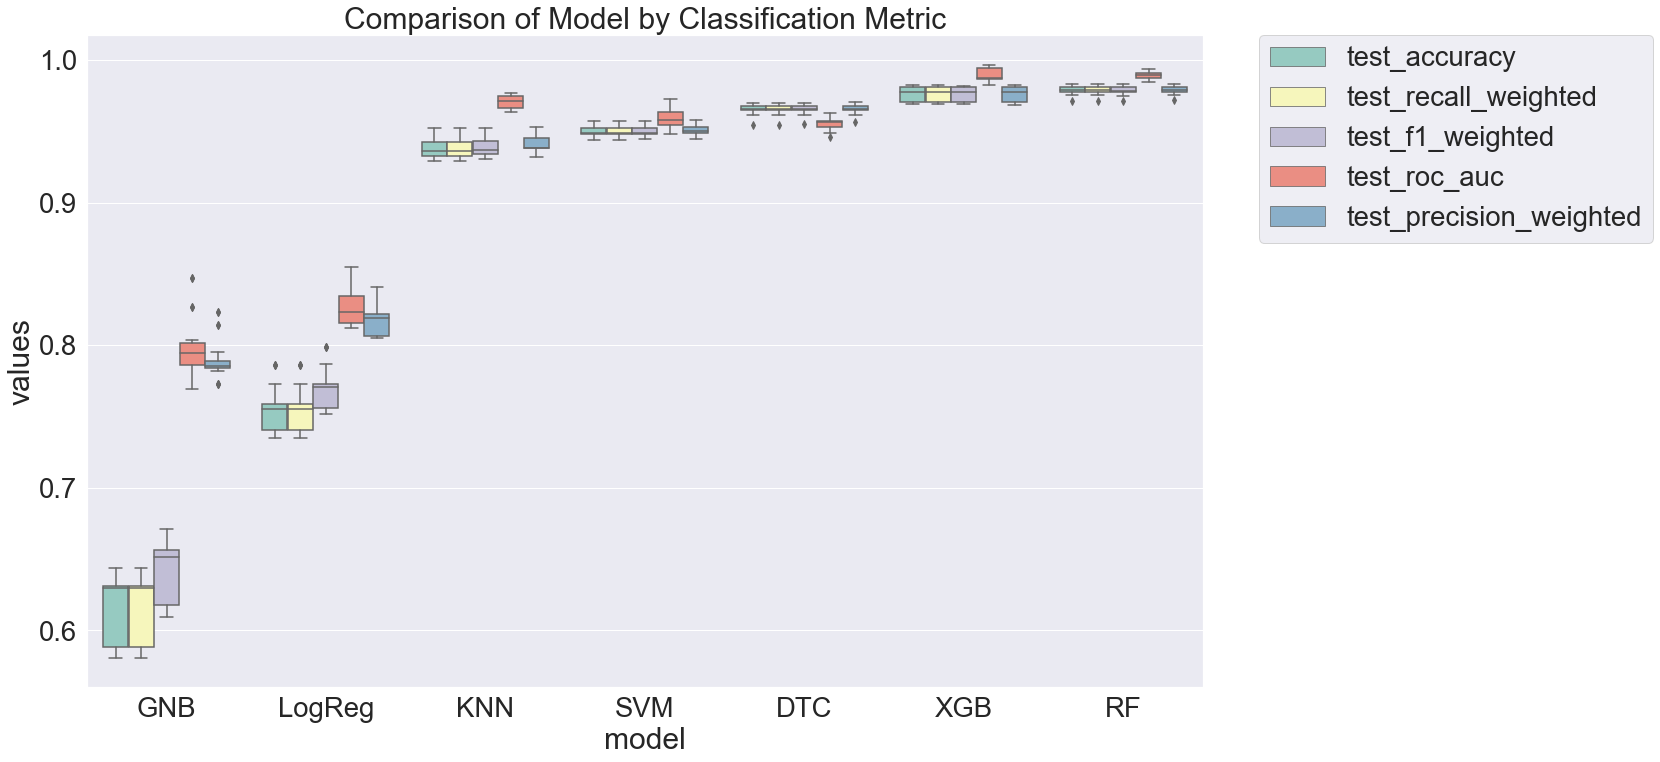

In [20]:
# Plot performance metrics 

plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)
# plt.xticks(rotation=90);

> Gaussian NB fits the data rather poorly across all metrics.
> The ensemble decision tree models **Random Forest** and **XGBoost** both fit the data very well and have the highest **accuracy scores at 98%** against a model baseline accuracy score of 76%. 
>
> *AUC is a performance matrix for binanry classification problems and represents a model's ability to differentiate between true positive and true negative classes and classify accordingly. A score of 1 or 100% indicates that a model made all predictions accurately.
> Accuracy on the other hand measures the number of correct predictions made as a ratio of all predictions made.
> Next step will be to perform hyperparameter tuning on these two models to affect performance. Can we improve on the scores obtained using the basline?* 

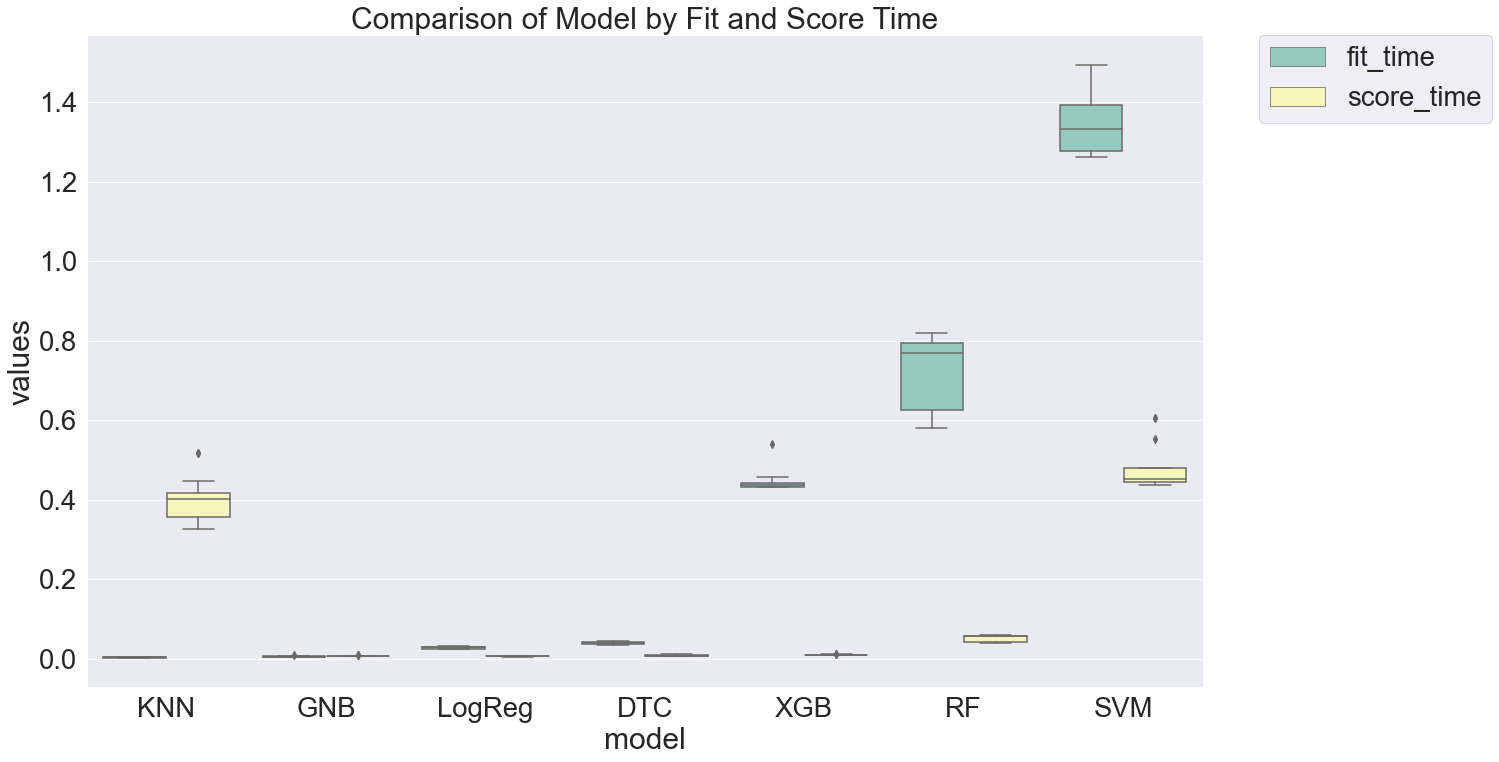

In [21]:
# plot the training and scoring times

plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [115]:
# mean and std for each model
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_roc_auc           test_recall_weighted            \
                std      mean                  std      mean   
model                                                          
DTC        0.004085  0.955832             0.002951  0.965880   
GNB        0.019266  0.796541             0.022812  0.615213   
KNN        0.004359  0.970041             0.006463  0.936202   
LogReg     0.014200  0.827590             0.015347  0.754971   
RF         0.002765  0.988990             0.002839  0.979029   
SVM        0.007230  0.958867             0.003695  0.949287   
XGB        0.004421  0.989925             0.005101  0.976540   

       test_precision_weighted           test_accuracy            \
                           std      mean           std      mean   
model                                                              
DTC                   0.002807  0.966143      0.002951  0.965880   
GNB                   0.012831  0.789046      0.022812  0.615213   
KNN                   0.005467  0.940318      0.006463  0.936202   
LogReg                0.010743  0.817873      0.015347  0.754971   
RF                    0.002783  0.979097      0.002839  0.979029   
SVM                   0.003768  0.950064      0.003695  0.949287   
XGB                   0.005130  0.976497      0.005101  0.976540   

       test_f1_weighted            
                    std      mean  
model                              
DTC            0.002911  0.965972  
GNB            0.020752  0.641208  
KNN            0.006193  0.937354  
LogReg         0.014325  0.770596  
RF             0.002903  0.978826  
SVM            0.003725  0.949563  
XGB            0.005082  0.976444

In [116]:
ime_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

fit_time           score_time          
             std      mean        std      mean
model                                          
DTC     0.002705  0.038585   0.001872  0.007921
GNB     0.001836  0.004770   0.001123  0.006427
KNN     0.000346  0.003223   0.059404  0.401667
LogReg  0.002567  0.028250   0.000625  0.006389
RF      0.092827  0.725102   0.007937  0.051112
SVM     0.081214  1.350386   0.052215  0.475626
XGB     0.026817  0.443882   0.000411  0.010461

>- SVM is the slowest model to train and score.
>- Random Forest and XGBoost were slower to train than the other models . Observed is a trade off in terms of performance and training time for SVM, Random Forest and XGBoost. Random Forest and XGBoost have higher accuracy, precision and recall scores than SVM. We will focus our attention on refining these two models to optimize their performance.

## Hyperparameters Tuning

Hyperparameter tuning is very important for improving the predictive ability of the models. Hyperparameters are parameters whose values influence the learning process and affect the model parameters that a learning algorithm learns. And the tuning of these hyperparameters means choosing the optimal set of values of the hyperparameters. There are many different ways to tune hyperparameters. Grid search cross validation (GridSearchCV) technique will be used to obtain the best parameter values from the given set of the grid parameters.

### Random Forest Classifier

#### Fine Tuning

In [22]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=101)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175, 200],
              'min_samples_split':[2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 10],
              'max_depth': np.arange(1, 100, 10)}

rf_gridsearch = GridSearchCV(rf_classifier, return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10,
                        verbose=1)

grid_fit = rf_gridsearch.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print('default parameters: ' + str(rf_gridsearch.best_estimator_))
print('best parameters: ' + str(rf_gridsearch.best_params_))
print('best score:', rf_gridsearch.best_score_)
print('='*20)

Fitting 10 folds for each of 1750 candidates, totalling 17500 fits
default parameters: RandomForestClassifier(class_weight='balanced', max_depth=21, n_estimators=200,
                       random_state=101)
best parameters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best score: 0.9905779509445519


> Random Forest allows us to know which features are of the most importance in predicting the target feature (status). Below, we plot features by their importance.

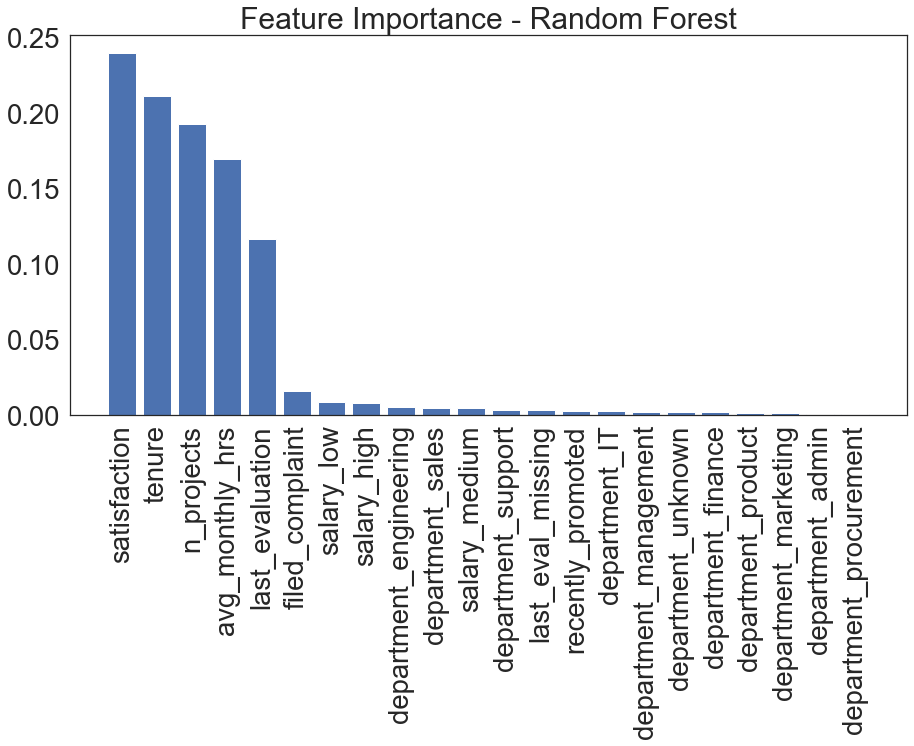

In [124]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance - Random Forest") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

> Random Forest helped us identify the Top 10 most important indicators (ranked in the table below).

In [24]:
len(names)

22

In [125]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(names)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,satisfaction,0.240094
1,tenure,0.211420
2,n_projects,0.192740
3,avg_monthly_hrs,0.169642
4,last_evaluation,0.116369
5,filed_complaint,0.015992
6,salary_low,0.008368
7,salary_high,0.007891
8,department_engineering,0.005342
9,department_sales,0.004456


#### Evaluation

Text(0.5, 257.44, 'Predicted label')

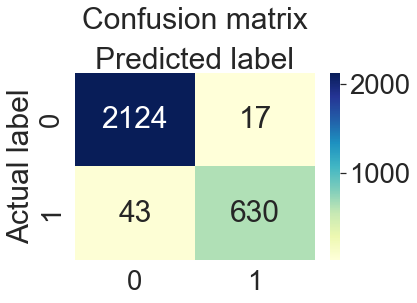

In [71]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Out of 2,814 employees in the test set, the algorithm: 
<br>
>* correctly predicted 630 employees as 'Left' (*True Positive*) and incorrectly predicted 17 (*Type I error*)
>* correctly predicted 2124 employees as 'Employed' (*True Negative*) and incorrectly predicted 43 (*Type II error*)

In [27]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 97.87


In [28]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2141
           1       0.97      0.94      0.95       673

    accuracy                           0.98      2814
   macro avg       0.98      0.96      0.97      2814
weighted avg       0.98      0.98      0.98      2814



>The output provides a first index referring to the probability that the data belong to class 0 (employee leaving), and the second refers to the probability that the data belong to class 1 (emplyee staying).
>
>The resulting AUC score is the same as the best score during the optimisation step. 

In [29]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.991


#### Save the Model

In [160]:
joblib.dump(rf_opt, 'model_rf.pkl')

['model_rf.pkl']

### XGBoost Classifier

#### Fine Tuning

In [31]:
xgb_classifier = XGBClassifier(random_state=101)

param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'learning_rate':[0.01, 0.05, 0.1, 0.2],
              'max_depth': [1, 5, 10, 20, 25]}

grid_objx = GridSearchCV(xgb_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fitx = grid_objx.fit(X_train, y_train)
xgb_opt = grid_fitx.best_estimator_

print("="*80)
print("best params: " + str(grid_objx.best_estimator_))
print("\nbest params: " + str(grid_objx.best_params_))
print("\nbest score:", grid_objx.best_score_)
print("="*80)

best params: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=25, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=175,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, ...)

best params: {'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 175}

best score: 0.9900835948688848


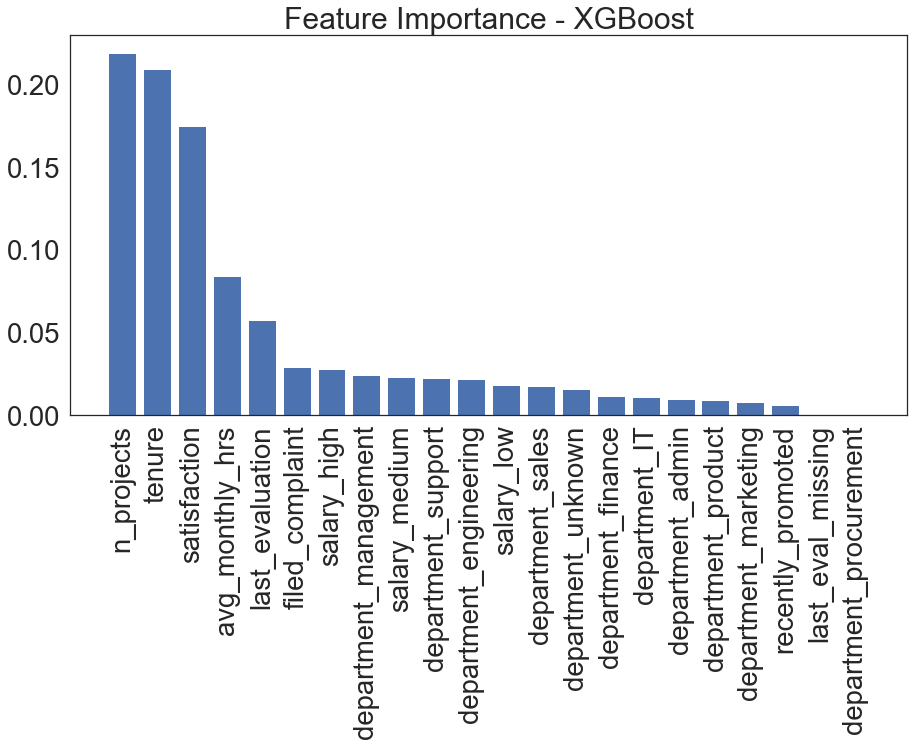

In [121]:
importances = xgb_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance - XGBoost") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

> The Top 10 most important features (ranked in the table below).

In [33]:
len(names) #length of features

22

In [122]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(names)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,n_projects,0.219033
1,tenure,0.209402
2,satisfaction,0.174682
3,avg_monthly_hrs,0.084210
4,last_evaluation,0.057529
5,filed_complaint,0.029234
6,salary_high,0.027858
7,department_management,0.024043
8,salary_medium,0.023254
9,department_support,0.022479


#### Evaluation

Text(0.5, 257.44, 'Predicted label')

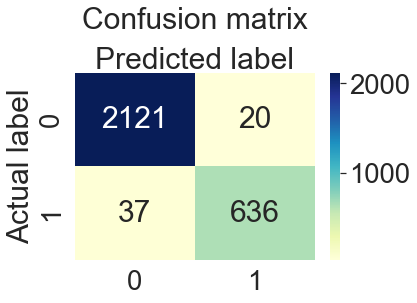

In [72]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, xgb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Out of 2,814 employees in the test set, the algorithm: 
<br>
>* correctly predicted 636 employees as 'Left' (*True Positive*) and incorrectly predicted 20 (*Type I error*)
>* correctly predicted 2121 employees as 'Employed' (*True Negative*) and incorrectly predicted 37 (*Type II error*)

In [36]:
print('Accuracy of XGBoost Classifier on test set: {:.2f}'.format(xgb_opt.score(X_test, y_test)*100))

Accuracy of XGBoost Classifier on test set: 97.97


In [37]:
# Classification report for the optimised XGBoost
xgb_opt.fit(X_train, y_train)
print(classification_report(y_test, xgb_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2141
           1       0.97      0.95      0.96       673

    accuracy                           0.98      2814
   macro avg       0.98      0.97      0.97      2814
weighted avg       0.98      0.98      0.98      2814



In [38]:
xgb_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = xgb_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
xgb_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % xgb_opt_roc_auc)

AUC score: 0.991


#### Save the Model

In [161]:
joblib.dump(xgb_opt, 'model_xgb.pkl')

['model_xgb.pkl']

### Receiver Operating Characteristic (ROC) Curve

>AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 


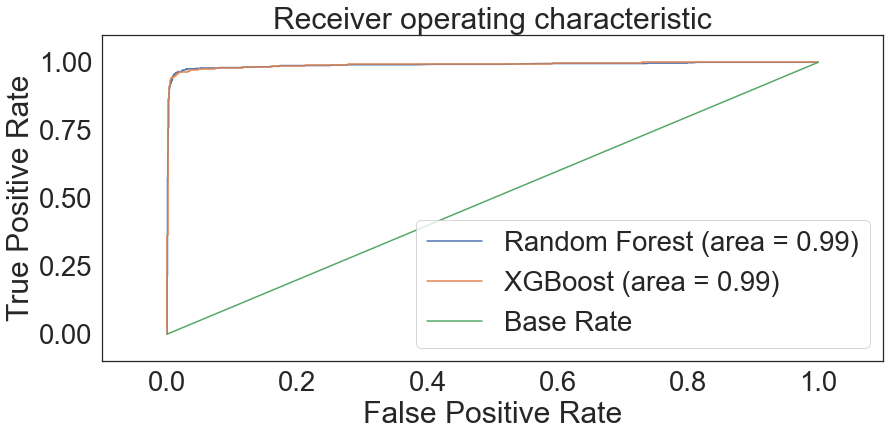

In [168]:
# Create ROC Graph
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)

# Plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_opt_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate') # diagonal line

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

>**The random forest and gradient-boosted trees both performed equally well with an AUC score of 0.99. Both algorithms have a 99% chance of distinguishing between a 'Left' and 'Employed' person.**
>
>The ROC curve plotted the true positive rate on the Y axis and the false positive rate on the X axis. The true positive rate is referred to sensitivity, and the false positive rate is referred to as specificity. The closer the curve is to the top left corner of the plot, the better the solution — with a value of (0.0, 0.99) as the absolute optimal point, signifying a 0% false positive rate and a 99% true positive rate.